# 📝 Exercise M6.02

The aim of this exercise it to explore some attributes available in
scikit-learn's random forest.

First, we will fit the penguins regression dataset.

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

penguins = pd.read_csv("../datasets/penguins_regression.csv")
feature_name = "Flipper Length (mm)"
target_name = "Body Mass (g)"
data, target = penguins[[feature_name]], penguins[target_name]
data_train, data_test, target_train, target_test = train_test_split(
    data, target, random_state=0)

<div class="admonition note alert alert-info">
<p class="first admonition-title" style="font-weight: bold;">Note</p>
<p class="last">If you want a deeper overview regarding this dataset, you can refer to the
Appendix - Datasets description section at the end of this MOOC.</p>
</div>

Create a random forest containing three trees. Train the forest and
check the generalization performance on the testing set in terms of mean
absolute error.

In [5]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

model = RandomForestRegressor(n_estimators=3)
model.fit(data_train ,target_train)
pred = model.predict(data_test)

print(f"mae: {mean_absolute_error(target_test, pred):.2f}g")


mae: 352.34g


The next steps of this exercise are to:

- create a new dataset containing the penguins with a flipper length
  between 170 mm and 230 mm;
- plot the training data using a scatter plot;
- plot the decision of each individual tree by predicting on the newly
  created dataset;
- plot the decision of the random forest using this newly created dataset.

<div class="admonition tip alert alert-warning">
<p class="first admonition-title" style="font-weight: bold;">Tip</p>
<p class="last">The trees contained in the forest that you created can be accessed
with the attribute <tt class="docutils literal">estimators_</tt>.</p>
</div>

/home/ismail/miniconda3/envs/scikit-learn-course/lib/python3.10/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
/home/ismail/miniconda3/envs/scikit-learn-course/lib/python3.10/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
/home/ismail/miniconda3/envs/scikit-learn-course/lib/python3.10/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(


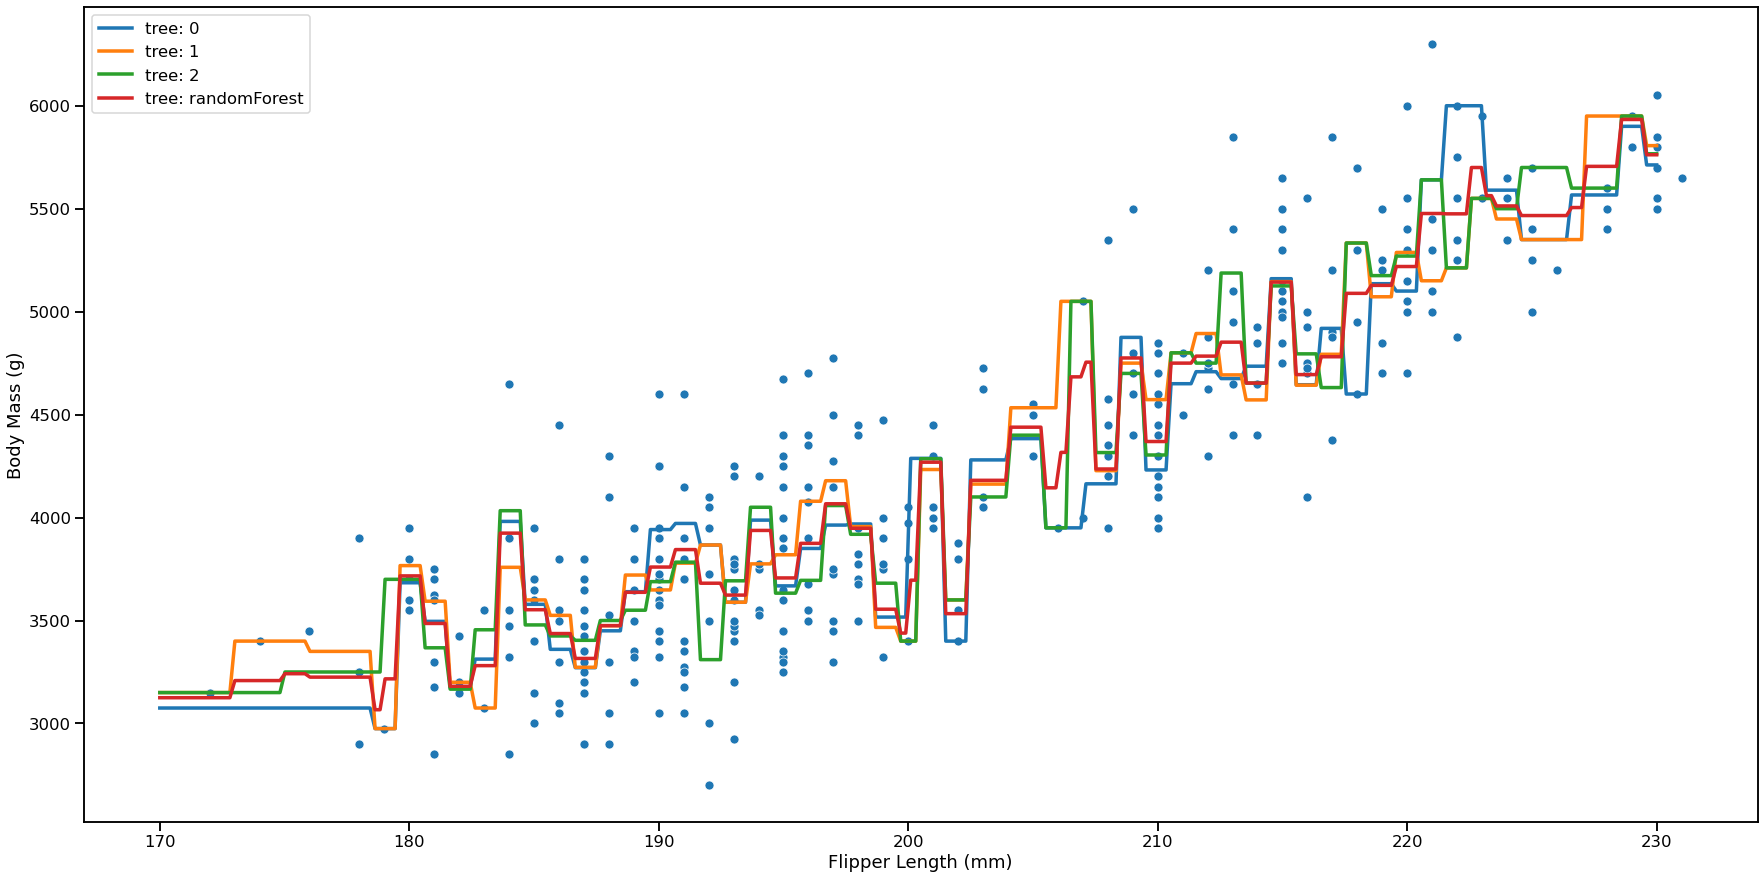

In [86]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

#create range of flippers to predict ond
data_range = pd.DataFrame(np.linspace(170, 230, num=300),
                          columns=data.columns)

forest_pred = model.predict(data_range)

plt.figure(figsize=(30,15))

#plot original data
ax = sns.scatterplot(data = penguins, x=feature_name, y=target_name,)

#plot each tree's predictions
for idx, tree in enumerate(model.estimators_):
    pred = tree.predict(data_range)
    plt.plot(data_range[feature_name], pred, label=f"tree: {idx}")

#plot forest pred
plt.plot(data_range[feature_name], forest_pred, label=f"tree: randomForest")

plt.legend()
